## Firearm Seizures
As a thief, the neighborhoods that we want to live in need to be the safest place to stay hidden and avoid attention from potential law enforcement. Also, as a thief we have a firearm, which we happend to have stolen, making it illigel and able to be seized by police. Because of these factors, the best neighborhood to live in for this aspect of theivery would be the one that we there are the least amount of firearm seizures.

In [2]:
import pandas as pd #import pandas for tables
%matplotlib inline    
#import plotting for graphs
import geopandas #import geopandas for the concentration map
import matplotlib.pyplot as plt #imports more for plotting 

First, we must look at all of the data for gun seizures, but quickly realise that this information is uninterpretable, meaning we must organise the data into a more readable and understandable fasion. 

In [3]:
All_Firearm_Data=pd.read_csv("Firearm Seizures.csv") #loads data from file
All_Firearm_Data.head() #prints out first 5 rows of data in table format

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
1,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
2,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
3,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
4,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


To better understand the data, first we can group the data by neighborhood and sum up all of the total seizures from each row for each neighborhood. This provides us with the information that we want, and by only looking at the neighborhoods and their summed total counts we are able to examine which neighborhood would be optimal for our life as a theif.

In [4]:

gun_sum=All_Firearm_Data.groupby('neighborhood').sum() #groups data based on neighborhood and sums the 
                                                        #columns for each group
gun_sum[['total_count']] #only prints out the neighborhood and the total_count of gun seizures in each neighborhood

,total_count
neighborhood,
Allegheny Center,13
Allegheny West,16
Allentown,73
Arlington,33
Arlington Heights,10
...,...
Upper Lawrenceville,14
West End,3
West Oakland,13


This is the data that we want, but there are too many neighborhoods to read easily or create a graph that is still able to be read. To solve this, we can filter through the data and only choose the data that has less than ten total seizures, reducing our possible neighborhood options from 88 to 18. Also, we can sort the data in ascending order to make it easier to see which neighborhoods have the least amount of firearm seizures. 

In [5]:
def filter_less_than(x,threshold):
    y=x.iloc[0,0] # current row quantity value 
    if  y<threshold: #if less than 10, keep line, otherwise ignore
        return True
    else:
        return False
only_low=gun_sum.groupby(gun_sum.index).filter(filter_less_than,threshold=15) #filters to only low count neighborhoods
only_low.sort_values(by=['total_count'], inplace=True) #sorts table in ascending order based on total count
sorted_results=only_low[['total_count']] #only displays neighborhood and total count
sorted_results

,total_count
neighborhood,
Lincoln Place,2
Oakwood,2
Swisshelm Park,3
West End,3
Regent Square,3
Summer Hill,3
Mt. Oliver,3
Chartiers City,4
Friendship,5


Now that we have gotten the data to the point we want it, we can graph it as a bar graph to better compare the neighborhoods. 

<AxesSubplot:title={'center':'Firearms Seized in Pittsburgh Neighborhoods'}, xlabel='Neighborhood', ylabel='Firearms Seized'>

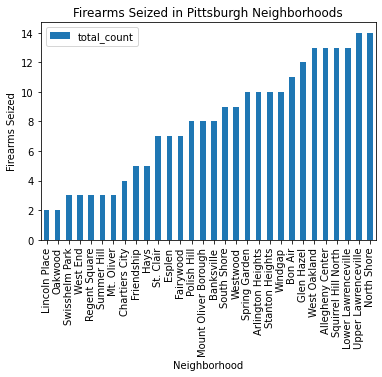

In [6]:
sorted_results.plot(title='Firearms Seized in Pittsburgh Neighborhoods',
                    xlabel='Neighborhood',ylabel='Firearms Seized',kind='bar') #creats bar graph with lables

Also, we can look at the data in a graph that displays a map of Pittsburgh that is colored according to the amount of firearms seized in that neighborhood.

<AxesSubplot:>

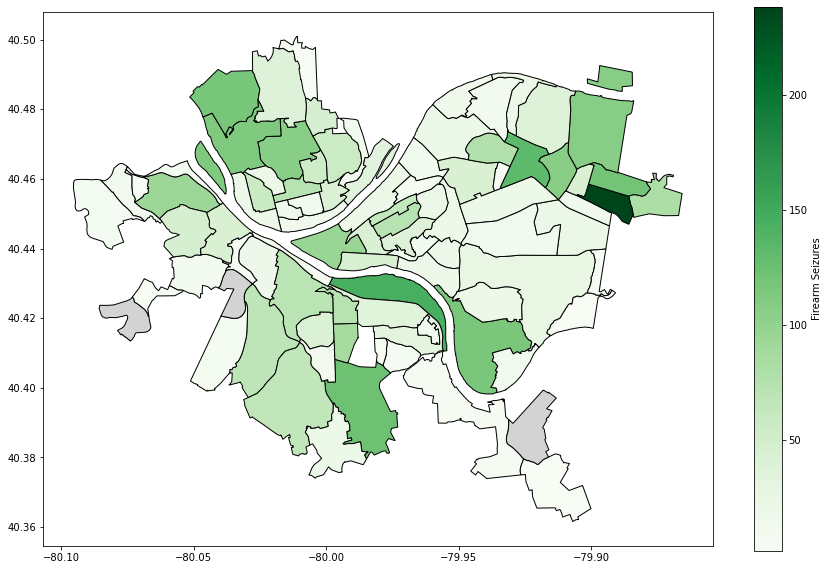

In [7]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
gun_map = neighborhoods.merge(gun_sum, how='left', left_on='hood', right_on='neighborhood') 
                                    #merges neighborhood graph with information about the seizurs per neighborhood
gun_map.plot(column='total_count', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="black",        # outline the districts in black
               legend=True,              # show the legend
               legend_kwds={'label': "Firearm Seizures"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

Finally, here is a picture of Pittsburgh with the neighborhood names included to better read the above graph.
Source: https://www.visitpittsburgh.com/neighborhoods/
![Neighborhoods](Neighborhood-Names.jpg)

## Analysis
Through looking at all of this data, if as a theif we want to live in a neighborhood that has the least firearm seizures, we shoul live in Oakwood or Lincoln place optimally, both only having two seizures, but places such as Mount Oliver or Summer Hill would also be viable, with only three seizures each. In reality, any of these neighborhoods in the top ten would be viable, and for which is best overall we will have to look at other aspects to decide which to choose. One thing to note from the opposite side though is that Homewood South would be one of the worst places to be located where the amount of seizures is significantly higher than all of the other neighborhoods. 